In [31]:
from skimage.feature import graycomatrix, graycoprops
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from tqdm import tqdm

In [2]:
from dotenv import load_dotenv
DATASET_PATH = os.environ.get('DATA_PATH')
DATASET_PATH

'/Users/firmansyahsundana/Documents/research/computer_science/plant-diseases-classification/Data/Processed/segmented_images'

# Data Preparation

In [3]:
imgs = []
labels = []

for folder in os.listdir(DATASET_PATH):
    for i, img in enumerate(os.listdir(os.path.join(DATASET_PATH, folder))):
        img = cv.imread(os.path.join(DATASET_PATH, folder, img))
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        imgs.append(gray)
        labels.append(folder)
        

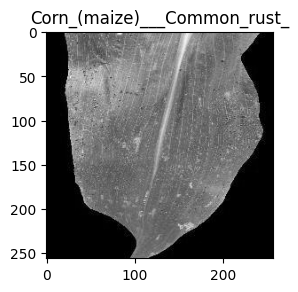

In [4]:
plt.figure(figsize=(10,10))
plt.subplot(331);plt.imshow(imgs[3000],cmap="grey");plt.title(labels[3000])
plt.show()

## Feature Extraction

### Grey-Level Co-Occurence Matrix (GLCM)

In [13]:
def calc_glcm_all_agls(img, label, props, dists=[1], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    glcm = graycomatrix(
        img,
        distances=dists,
        angles=agls,
        levels=lvl,
        symmetric=sym,
        normed=norm
    )
    feature = []
    glcm_props = [propery for name in props for propery in graycoprops(glcm, name)[0]]
    for item in glcm_props:
        feature.append(item)
    feature.append(label)
    return feature

In [14]:
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

glcm_all_agls = []
for img, label in tqdm(zip(imgs, labels)):
    glcm_all_agls.append(
        calc_glcm_all_agls(
            img,
            label,
            props=properties
        )
    )


columns = []
angels = ['0', '45', '90', '135']
for name in properties:
    for ang in angels:
        columns.append(name + "_" + ang)

columns.append("label")

6844it [01:52, 61.10it/s]


In [15]:
import pandas as pd

glcm_df = pd.DataFrame(glcm_all_agls,
                        columns = columns)

# Save to csv
glcm_df.to_csv("glcm_plant_diseases_dataset.csv")

In [20]:
DATA_PATH = "/Users/firmansyahsundana/Documents/research/computer_science/plant-diseases-classification/Data/Processed/glcm_plant_diseases_dataset_v2.csv"

## Load GLCM feature

In [21]:
df = pd.read_csv(DATA_PATH)
df.head()

,Unnamed: 0,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,0,9.849740,11.520323,9.812638,13.715802,0.920284,0.889804,0.912857,0.844475,0.110480,...,346.881384,0.000244,0.000217,0.000285,0.000192,0.015636,0.014744,0.016888,0.013856,Corn_(maize)___healthy
1,1,2.120159,2.886874,2.798775,3.825498,0.984605,0.974881,0.975103,0.952098,0.417113,...,32.720815,0.002374,0.001585,0.001695,0.001330,0.048729,0.039807,0.041174,0.036467,Corn_(maize)___healthy
2,2,4.846094,4.875448,3.143290,6.423130,0.985696,0.986567,0.994154,0.975893,0.255203,...,94.552772,0.000626,0.000577,0.000807,0.000455,0.025015,0.024029,0.028400,0.021322,Corn_(maize)___healthy
3,3,4.817923,3.444937,3.531939,7.193187,0.977810,0.988842,0.987764,0.950202,0.207191,...,94.630265,0.000491,0.000659,0.000667,0.000340,0.022168,0.025674,0.025817,0.018428,Corn_(maize)___healthy
4,4,4.187454,4.698731,2.594960,4.942545,0.964555,0.958162,0.986078,0.952794,0.255668,...,49.558431,0.001388,0.001151,0.001813,0.001125,0.037261,0.033933,0.042582,0.033542,Corn_(maize)___healthy


## Prepare training and testing data

In [23]:
X = df.iloc[:,1:-1]
y = df.label

In [24]:
X.describe()

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_90,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135
count,6844.000000,6844.000000,6844.000000,6844.000000,6844.000000,6844.000000,6844.000000,6844.000000,6844.000000,6844.000000,...,6844.000000,6844.000000,6844.000000,6844.000000,6844.000000,6844.000000,6844.000000,6844.000000,6844.000000,6844.000000
mean,9.992228,11.477683,8.934951,11.336151,0.934709,0.918546,0.947187,0.920127,0.295202,0.273387,...,288.277268,412.675878,0.052632,0.051984,0.053352,0.052006,0.179320,0.177274,0.181235,0.177309
std,4.068054,4.444904,4.381981,4.391701,0.049179,0.056582,0.044877,0.056343,0.123471,0.125229,...,235.418619,261.668244,0.071104,0.070798,0.071762,0.070834,0.143108,0.143389,0.143209,0.143425
min,0.945113,1.112280,0.642785,1.252180,0.404456,0.406489,0.521380,0.405713,0.038098,0.037289,...,1.242356,4.396909,0.000067,0.000064,0.000068,0.000067,0.008182,0.008024,0.008264,0.008200
25%,7.325222,8.673087,5.879822,8.459289,0.919675,0.897706,0.933560,0.901009,0.203641,0.178652,...,122.561926,240.440127,0.001247,0.000996,0.001457,0.000996,0.035314,0.031562,0.038168,0.031558
50%,9.931173,11.361599,8.438358,11.204652,0.946724,0.932528,0.959647,0.934275,0.289975,0.263519,...,236.952727,389.806974,0.028921,0.028211,0.029308,0.028195,0.170061,0.167960,0.171195,0.167913
75%,12.473709,14.090992,11.355955,13.907293,0.964553,0.954121,0.975304,0.955285,0.372722,0.350544,...,394.940437,548.047762,0.074330,0.073050,0.075219,0.073035,0.272636,0.270278,0.274261,0.270250
max,28.469056,28.549419,27.147105,28.543329,0.998405,0.998021,0.999544,0.998018,0.799918,0.797393,...,2203.092999,2476.239047,0.590041,0.589055,0.594945,0.591136,0.768141,0.767499,0.771327,0.768854


In [25]:
X.head()

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_90,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135
0,9.849740,11.520323,9.812638,13.715802,0.920284,0.889804,0.912857,0.844475,0.110480,0.097791,...,194.621369,346.881384,0.000244,0.000217,0.000285,0.000192,0.015636,0.014744,0.016888,0.013856
1,2.120159,2.886874,2.798775,3.825498,0.984605,0.974881,0.975103,0.952098,0.417113,0.313785,...,17.004933,32.720815,0.002374,0.001585,0.001695,0.001330,0.048729,0.039807,0.041174,0.036467
2,4.846094,4.875448,3.143290,6.423130,0.985696,0.986567,0.994154,0.975893,0.255203,0.235123,...,22.982261,94.552772,0.000626,0.000577,0.000807,0.000455,0.025015,0.024029,0.028400,0.021322
3,4.817923,3.444937,3.531939,7.193187,0.977810,0.988842,0.987764,0.950202,0.207191,0.264675,...,23.272963,94.630265,0.000491,0.000659,0.000667,0.000340,0.022168,0.025674,0.025817,0.018428
4,4.187454,4.698731,2.594960,4.942545,0.964555,0.958162,0.986078,0.952794,0.255668,0.219627,...,14.626976,49.558431,0.001388,0.001151,0.001813,0.001125,0.037261,0.033933,0.042582,0.033542


In [26]:
y.describe()

count                            6844
unique                              4
top       Corn_(maize)___Common_rust_
freq                             1907
Name: label, dtype: object

## Normalize Data

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.03502882,  0.00959368,  0.20030923, ..., -1.13357069,
        -1.14768474, -1.13972498],
       [-1.93523576, -1.93287355, -1.4004226 , ..., -0.9587691 ,
        -0.97808714, -0.98206212],
       [-1.26510371, -1.48545801, -1.3217958 , ..., -1.06880748,
        -1.06729105, -1.08766472],
       ...,
       [ 0.23822993,  0.0563466 , -0.87193095, ...,  0.00706091,
         0.02850514,  0.00753125],
       [-0.31193294,  0.00318211,  0.6045118 , ...,  1.36267628,
         1.33535424,  1.35529595],
       [ 1.21531771,  2.4001581 ,  2.74917396, ...,  0.09530986,
         0.06646652,  0.10325054]])

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
len(X_train), len(X_test)

(5475, 1369)

# Methods

## SVM

In [35]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [36]:
from sklearn.metrics import classification_report

y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

                                     precision    recall  f1-score   support

        Corn_(maize)___Common_rust_       0.85      0.90      0.87       374
      Corn_(maize)___Gray_leaf_spot       0.83      0.73      0.77       320
Corn_(maize)___Northern_Leaf_Blight       0.76      0.74      0.75       291
             Corn_(maize)___healthy       0.94      0.99      0.96       384

                           accuracy                           0.85      1369
                          macro avg       0.84      0.84      0.84      1369
                       weighted avg       0.85      0.85      0.85      1369



## Naive Bayes

In [37]:
# Scale data for Naive Bayes between 0 and 1
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_min_max_scaled = min_max_scaler.transform(X_train)
X_train_min_max_scaled

array([[0.31162318, 0.38562861, 0.26834988, ..., 0.00759096, 0.01155503,
        0.00879891],
       [0.68734997, 0.67964128, 0.49970015, ..., 0.2399682 , 0.24396369,
        0.23917413],
       [0.37503388, 0.57560843, 0.59644864, ..., 0.00960047, 0.00996171,
        0.00960002],
       ...,
       [0.25706006, 0.47298021, 0.46782512, ..., 0.17533888, 0.17416354,
        0.17514175],
       [0.46460162, 0.63614315, 0.69226319, ..., 0.11542746, 0.11377291,
        0.11378838],
       [0.09393337, 0.16609887, 0.10798767, ..., 0.01456187, 0.02130917,
        0.02315184]])

In [38]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_min_max_scaled, y_train)

MultinomialNB()

In [39]:
y_nb_pred = nb.predict(X_test)

print(classification_report(y_test, y_nb_pred))

                                     precision    recall  f1-score   support

        Corn_(maize)___Common_rust_       0.48      0.09      0.15       374
      Corn_(maize)___Gray_leaf_spot       0.59      0.34      0.43       320
Corn_(maize)___Northern_Leaf_Blight       0.37      0.43      0.40       291
             Corn_(maize)___healthy       0.49      0.99      0.66       384

                           accuracy                           0.47      1369
                          macro avg       0.48      0.46      0.41      1369
                       weighted avg       0.48      0.47      0.41      1369



## Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
y_rf_pred = rf.predict(X_test)
print(classification_report(y_test, y_rf_pred))

                                     precision    recall  f1-score   support

        Corn_(maize)___Common_rust_       0.88      0.92      0.90       374
      Corn_(maize)___Gray_leaf_spot       0.85      0.77      0.81       320
Corn_(maize)___Northern_Leaf_Blight       0.81      0.82      0.82       291
             Corn_(maize)___healthy       0.97      1.00      0.98       384

                           accuracy                           0.89      1369
                          macro avg       0.88      0.88      0.88      1369
                       weighted avg       0.88      0.89      0.88      1369



## XGBoost

In [43]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test, label=y_test_encoded)

In [56]:
# Hyperparameters for XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': 4,
    'max_depth': 6,
    'eta': 0.3,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

num_round = 100
bst = xgb.train(params, dtrain, num_round)

In [57]:
# Predict labels for test set
y_pred_encoded = bst.predict(dtest)

# Decode labels
y_bst_pred = label_encoder.inverse_transform(y_pred_encoded.astype(int))
print(classification_report(y_test, y_bst_pred))

                                     precision    recall  f1-score   support

        Corn_(maize)___Common_rust_       0.89      0.94      0.91       374
      Corn_(maize)___Gray_leaf_spot       0.84      0.78      0.81       320
Corn_(maize)___Northern_Leaf_Blight       0.84      0.82      0.83       291
             Corn_(maize)___healthy       0.97      1.00      0.99       384

                           accuracy                           0.89      1369
                          macro avg       0.88      0.88      0.88      1369
                       weighted avg       0.89      0.89      0.89      1369



## Neural Network

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [47]:
# Convert DataFrame to PyTorch Tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.float32)

# Create DataLoader for training and testing sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x3122ce7e0>,
 <torch.utils.data.dataloader.DataLoader at 0x31e5d4b60>)

In [50]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [58]:
# Instantiate the model, loss function, and optimizer

neural_network = NeuralNetwork(
    input_shape = 24, # Num of features
    hidden_units = 512,
    output_shape = 4 # Num of classes
)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(neural_network.parameters(), lr=0.001)


neural_network.to("cpu")

NeuralNetwork(
  (layer_stack): Sequential(
    (0): Linear(in_features=24, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=4, bias=True)
  )
)

In [60]:
EPOCHS = 100

for epoch in range(EPOCHS):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = neural_network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Print training loss after each epoch
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Evaluate the model on the test set
neural_network.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = neural_network(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {correct/total}")

Epoch 1, Loss: 0.10484237968921661
Epoch 2, Loss: 0.648796021938324
Epoch 3, Loss: 0.04447153955698013
Epoch 4, Loss: 0.21751753985881805
Epoch 5, Loss: 0.019568465650081635
Epoch 6, Loss: 0.1047867015004158
Epoch 7, Loss: 0.06651751697063446
Epoch 8, Loss: 0.06987186521291733
Epoch 9, Loss: 0.18652965128421783
Epoch 10, Loss: 0.37424302101135254
Epoch 11, Loss: 0.07484129071235657
Epoch 12, Loss: 0.11643610149621964
Epoch 13, Loss: 0.056227438151836395
Epoch 14, Loss: 0.067232646048069
Epoch 15, Loss: 0.03128817304968834
Epoch 16, Loss: 0.07790481299161911
Epoch 17, Loss: 0.10521120578050613
Epoch 18, Loss: 0.22889305651187897
Epoch 19, Loss: 0.014590103179216385
Epoch 20, Loss: 0.06421425938606262
Epoch 21, Loss: 0.011674543842673302
Epoch 22, Loss: 0.0974578708410263
Epoch 23, Loss: 0.0017673056572675705
Epoch 24, Loss: 0.019836772233247757
Epoch 25, Loss: 0.023336809128522873
Epoch 26, Loss: 0.0657878965139389
Epoch 27, Loss: 0.049617234617471695
Epoch 28, Loss: 0.01222586538642644